import important libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


load the data set

In [ ]:
file_path = 'Updated_StudentPerformanceFactors_Cleaned.csv'
data = pd.read_csv(file_path)

preprocess the data check for the missing values

In [ ]:
print(data.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
Teacher_Notes                 0
dtype: int64


Encode categorical features

In [ ]:
features = ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources',
            'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Family_Income' , 'Learning_Disabilities', 'Distance_from_Home', 'Gender']  # Include 'Gender_Male' here
target = 'Exam_Score'

X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import LabelEncoder # label encoder is used to convert categorical features into numerical labels
label_encoder = LabelEncoder()
for column in ['Learning_Disabilities', 'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Distance_from_Home', 'Gender']:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])
    # many machine learning algorithms work best with numerical data.



Standardize the features

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# by scaling the features to a standard range, we can prevent features with larger values from dominating the model and improve the performance of algorithms that are sensetive to features scales

Train SVR Model

In [ ]:
svr = SVR(kernel='rbf') # here rbf stands for radial basis function a popular kernal choice for svr it allows the model to capture nonlinear relationships in the data
svr.fit(X_train_scaled, y_train)

SVR()

Evaluate The Model

In [ ]:
y_pred = svr.predict(X_test_scaled) # uses the trained svr model to make predictions on the scaled testing data
mse = mean_squared_error(y_test, y_pred) # calculates the MSE between the actual target values and the predicted values
r2 = r2_score(y_test, y_pred) # its a common metric for evaluating regression models
# it represents a propation of variance in the target variable that is explained by the model

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Example usage
print(f'Predicted Exam Scores: {y_pred}')

Mean Squared Error: 5.375212186370354
R^2 Score: 0.6540897245617586
Predicted Exam Scores: [72.24759362 66.1641813  69.37390701 ... 63.76511734 66.51781343
 73.17184887]


Create a scatter plot to visualize predictions vs. actual data

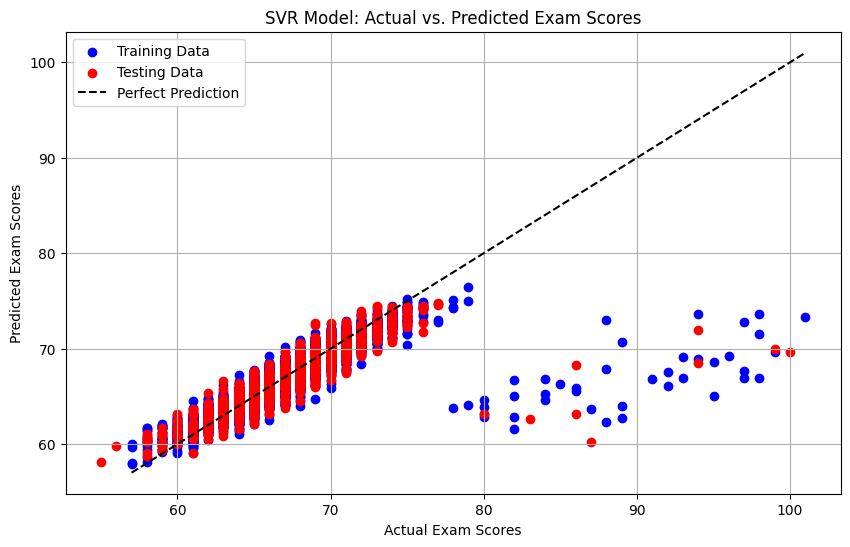

In [ ]:
import matplotlib.pyplot as plt

# Predict on the training data to get y_pred_train
y_pred_train = svr.predict(X_train_scaled)
y_pred_test = y_pred  # Assign y_pred to y_pred_test for clarity

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, color='blue', label='Training Data')
plt.scatter(y_test, y_pred_test, color='red', label='Testing Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black', linestyle='--', label='Perfect Prediction')  # Diagonal line
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('SVR Model: Actual vs. Predicted Exam Scores')
plt.legend()
plt.grid(True)
plt.show()

Cross validation for SVR model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# ... (your existing data loading and preprocessing code) ...

# Step 5: Train the SVR model with Cross-Validation
svr = SVR(kernel='rbf')  # You can experiment with different kernels
# Svr is a powerful regression algorithm, and the RPF kernel is a versatile choice for handling non linear relationships in the data.

# Perform cross-validation (e.g., 5-fold)
scores = cross_val_score(svr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
#this line performs 5 flod cross validation on the training data. It splits the training data into 5 folds, trains the SVR model on 4 folds, and evaluates it on the remaining fold. This process is repeated 5 times, with each fold serving as the evaluation set once.
# Convert negative MSE to positive
mse_scores = -scores
#this line converts the negative MSE scores to positive MSE scores. its more intutive to work with positive MSE values, where lower values indicate better performance

# Calculate average MSE and its standard deviation
avg_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f'Average Mean Squared Error (Cross-Validation): {avg_mse}')
print(f'Standard Deviation of MSE (Cross-Validation): {std_mse}')
# this allows you to see model's performance metrics obtained from cross-validation

# Fit the model on the entire training data for final evaluation
svr.fit(X_train_scaled, y_train)

# Step 6: Evaluate the model on the test set
y_pred = svr.predict(X_test_scaled) # this line uses the trained SVR model to make predictions on the scaled testing data.
mse = mean_squared_error(y_test, y_pred) #MSE and R^2 are common metrics for evaluating regression models.
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (Test Set): {mse}')
print(f'R^2 Score (Test Set): {r2}')
# this allows you to see the final performance metrics of the model on unseen data, providing an estimate of its real world performance.
# ... (your existing plotting code) ...

Average Mean Squared Error (Cross-Validation): 5.609003941995445
Standard Deviation of MSE (Cross-Validation): 1.29211012412305
Mean Squared Error (Test Set): 5.375212186370354
R^2 Score (Test Set): 0.6540897245617586


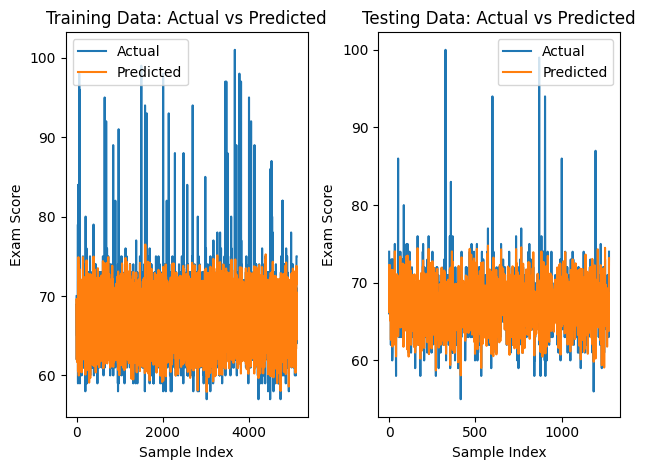

In [ ]:
import matplotlib.pyplot as plt

# Predict on the training data to get y_pred_train
y_pred_train = svr.predict(X_train_scaled)  # This line is crucial
y_pred_test = y_pred  # Assign y_pred to y_pred_test for clarity

# ... (rest of your plotting code) ...

plt.subplot(1, 2, 1)
plt.plot(y_train.values, label='Actual')
plt.plot(y_pred_train, label='Predicted')  # Now y_pred_train is defined
plt.xlabel('Sample Index')
plt.ylabel('Exam Score')
plt.title('Training Data: Actual vs Predicted')
plt.legend()

# Plot for testing data
plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_test, label='Predicted')  # Assuming y_pred_test is also defined correctly
plt.xlabel('Sample Index')
plt.ylabel('Exam Score')
plt.title('Testing Data: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

Hyper Parameter Optimization

In [ ]:
 # Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.5, 1],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}
# C is the regularization parameter
# epsilon is the training loss function
# gamma is a kernel coefficient
# Create GridSearchCV object
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
# this line creates a grid search cv object which is used to perform an exaustive search over the specified hyper parameter grid.
# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)



GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto', 0.1, 1, 10]},
             scoring='neg_mean_squared_error')

Apply evaluation matrices to the SVR model

Mean Absolute Error: 1.066487620797966
Root Mean Squared Error: 2.318450384711813


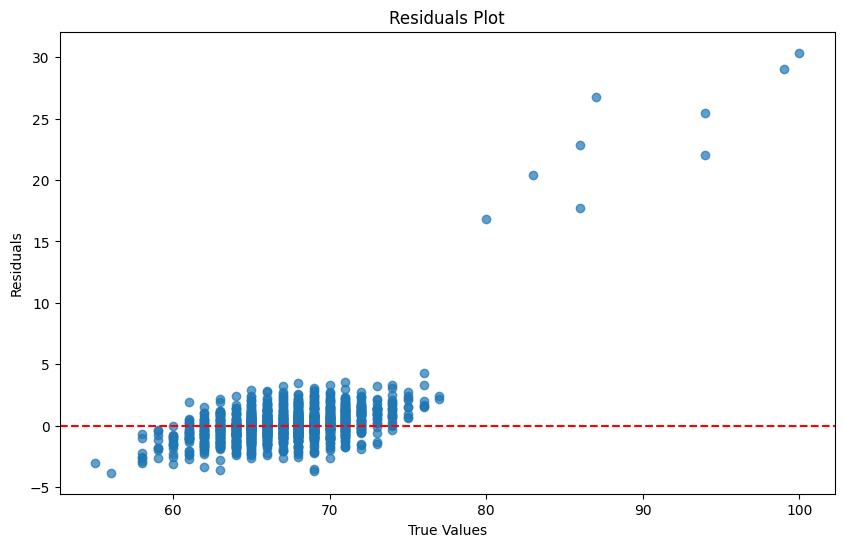

Hours_Studied: 5.6043
Attendance: 10.2375
Parental_Involvement: 0.7010
Access_to_Resources: 0.7389
Sleep_Hours: 0.0022
Previous_Scores: 0.9051
Motivation_Level: 0.1886
Family_Income: 0.2241
Learning_Disabilities: 0.1661
Distance_from_Home: 0.1917
Gender: -0.0157


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Additional metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
# MAE and RMSE are common regression metrics that provide different perspectives on the model's error. MAE represents the average absolute difference between predicted and actual values, while RMSE gives more weight to larger errors.
# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.show()
# this section creates a residuals plot, which visualizes the difference between the predicted and actual values (residuals) against the actual values.
# Feature importance via permutation
perm_importance = permutation_importance(svr, X_test_scaled, y_test, scoring='neg_mean_squared_error')
feature_importance = perm_importance.importances_mean
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")
# It shuffles the values of each feature individually and measures the impact on the model's performance (negative MSE).

Apply wrong predictions to the model

Wrong Predictions (Residual > 10):
      True Values  Predicted Values  Residuals
3035           86         63.118144  22.881856
5787           80         63.186799  16.813201
93            100         69.625525  30.374475
544            83         62.602115  20.397885
805            94         68.518932  25.481068
3455           99         69.976945  29.023055
742            94         71.960727  22.039273
2337           86         68.272566  17.727434
2596           87         60.242413  26.757587


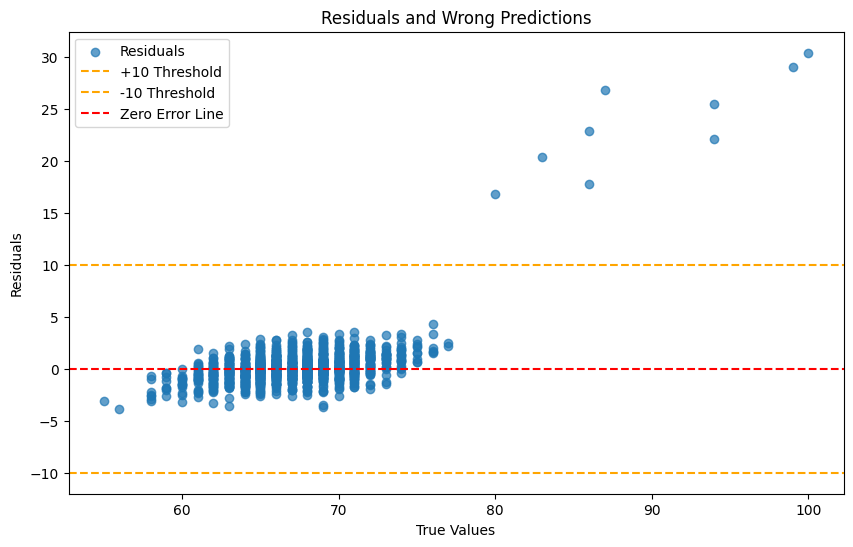

Wrong predictions saved to 'wrong_predictions.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred
# residuals calculate the difference between the actual values and the predicted values, these differences are the errors made by the model
# Define a threshold for wrong predictions
threshold = 10  # Adjust this value as needed
# The threshold helps to identify predictions that are significantly off from the true values, allowing for focused analysis of these cases.
wrong_predictions = pd.DataFrame({
    "True Values": y_test,
    "Predicted Values": y_pred,
    "Residuals": residuals
})
#Creates a Pandas DataFrame called wrong_predictions to store the true values, predicted values, and residuals.
#Filters the DataFrame to keep only the rows where the absolute value of the residual is greater than the threshold, effectively isolating the wrong predictions.
wrong_predictions = wrong_predictions[np.abs(residuals) > threshold]

# Print wrong predictions
print(f"Wrong Predictions (Residual > {threshold}):")
print(wrong_predictions)

# Visualize wrong predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7, label="Residuals")
plt.axhline(threshold, color='orange', linestyle='--', label=f"+{threshold} Threshold")
plt.axhline(-threshold, color='orange', linestyle='--', label=f"-{threshold} Threshold")
plt.axhline(0, color='red', linestyle='--', label="Zero Error Line")
plt.title("Residuals and Wrong Predictions")
plt.xlabel("True Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

# Save wrong predictions to a CSV file
wrong_predictions.to_csv("wrong_predictions.csv", index=False)
print("Wrong predictions saved to 'wrong_predictions.csv'.")